In [ ]:
!pip install wandb
!pip install torch
!pip install lightning
!pip install matplotlib
!pip install tqdm
!pip install sentence-transformers

# Inference of Text to Image Network

In [1]:
import torch
import lightning as L
from lightning.pytorch.loggers import WandbLogger
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer
import numpy as np

from datasets import EncodedMNIST
from cINN import ConditionalRealNVP, OurConditionalRealNVP
from autoencoder import AutoencoderSimple
from utils import get_best_device

/Users/henrismidt/anaconda3/envs/gnn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load pretrained models

In [2]:
embedding_model = SentenceTransformer("intfloat/multilingual-e5-small")

In [3]:
ae_path = "./models/ae_100.pth"
autoencoder = AutoencoderSimple()
autoencoder.load_state_dict(torch.load(ae_path, map_location=get_best_device()))

<All keys matched successfully>

In [4]:
cinn = ConditionalRealNVP(input_size=64, hidden_size=128, n_blocks=20, condition_size=384)
cinn.load_state_dict(torch.load('models/cinn_100.pth'))


<All keys matched successfully>

## Sample with Condition

In [5]:
condition_0 = embedding_model.encode('eight')

In [7]:
cinn.eval()
samples = cinn.sample(2, condition_0)

In [8]:
images = [autoencoder.decoder(sample) for sample in samples]

In [9]:
import matplotlib.pyplot as plt
def display_image(tensor):
    """
    Display an image from a 4D PyTorch tensor.

    Parameters:
    - tensor: a PyTorch tensor of shape (1, 1, 28, 28)
    """
    if tensor.ndim == 4 and tensor.shape[1] == 1:
        # Remove the first two dimensions (batch size and channels) for display
        image = tensor.squeeze().detach()  # This should result in a 2D tensor for grayscale images
        plt.imshow(image, cmap='gray')
        plt.axis('off')  # Hide the axes
        plt.show()
    else:
        print("The input tensor does not have the correct shape.")

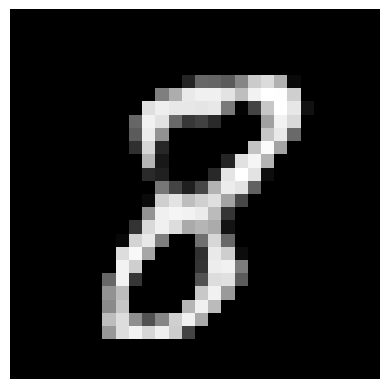

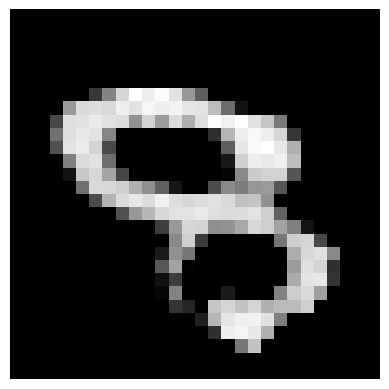

In [10]:
for image in images:
    display_image(image)